<a href="https://colab.research.google.com/github/dhruvi003/ML-Learning/blob/main/feature_engineering_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [21]:
df = pd.read_csv('/content/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df.shape

(731, 16)

In [ ]:
day_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.weathersit.nunique()

3

In [7]:
for col in df.columns:
  print(col, df[col].nunique())
  # print(col, day_df[col].munique().value_counts)

instant 731
dteday 731
season 4
yr 2
mnth 12
holiday 2
weekday 7
workingday 2
weathersit 3
temp 499
atemp 690
hum 595
windspeed 650
casual 606
registered 679
cnt 696


In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
categorical_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed','cnt']

In [ ]:
#  Checking null values
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# how many values are there as '0'
# we focus on numeric and ignore categorical columns
for col in df.columns:
    if col in numerical_cols:
        filtered_col = df[col].apply(lambda x: x == 0)
        print(col, filtered_col.sum())

# print(filtered_col)



temp 0
atemp 0
hum 1
windspeed 0
cnt 0


In [4]:
# null values count
for col in df.columns:
  print(col, df[col].isnull().sum())

instant 0
dteday 0
season 0
yr 0
mnth 0
holiday 0
weekday 0
workingday 0
weathersit 0
temp 0
atemp 0
hum 0
windspeed 0
casual 0
registered 0
cnt 0


In [5]:
# duplicate rows count
df.duplicated().sum()

np.int64(0)

In [8]:
# step 2: 2.1) drop unnecessary comments
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
# dropping columns : instant, casual, registered
df.drop(['instant','casual','registered'], axis=1, inplace=True)

In [13]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [27]:
df.drop(['dteday'], axis=1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [30]:
target = df['cnt']
features = df.drop(['cnt', 'dteday'], axis=1)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

random_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_model.fit(X_train, y_train)
y_pred = random_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", np.sqrt(mse))

Root Mean Squared Error: 677.0871048743101


In [33]:
avg_rentals = y_test.mean()
rmse = np.sqrt(mse)
percentage_error = (rmse / avg_rentals) * 100

print("Average Rentals:", avg_rentals)
print("RMSE:", rmse)
print("Percentage Error:", percentage_error, "%")


Average Rentals: 4279.374149659864
RMSE: 677.0871048743101
Percentage Error: 15.822105784513528 %


In [36]:
import matplotlib.pyplot as plt
importance = random_model.feature_importances_

feat_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feat_importances)

       Feature  Importance
7         temp    0.351733
1           yr    0.279657
8        atemp    0.155569
9          hum    0.059340
0       season    0.052566
10   windspeed    0.032912
2         mnth    0.026553
6   weathersit    0.018494
4      weekday    0.015780
5   workingday    0.004390
3      holiday    0.003005


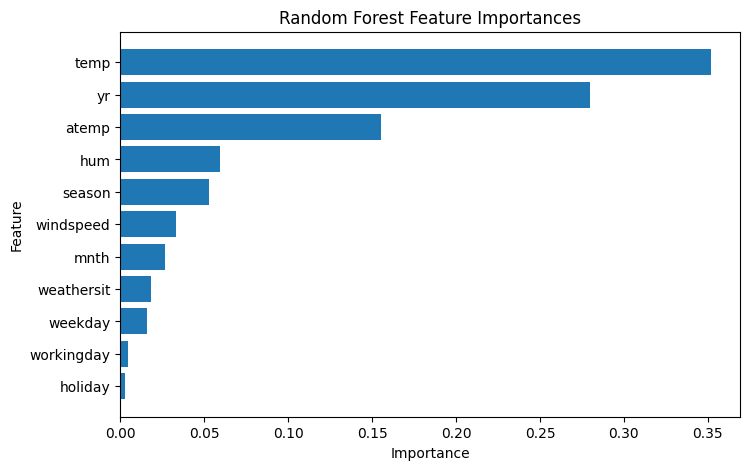

In [37]:
plt.figure(figsize = (8,5))
plt.barh(feat_importances['Feature'], feat_importances['Importance'])
plt.gca().invert_yaxis()  # highest at top
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importances")
plt.show()